# Estratégia de cruzamento de médias móveis

## Importar as bibliotecas

In [135]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import mplcyberpunk
plt.style.use("cyberpunk")

## Pegar os dados do Yahoo Finance

In [137]:
ticker = "ALPA4.SA"
dados = yf.download(ticker, start="2021-05-27", end="2024-09-10")
dados

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-27,44.505642,45.944530,44.016018,45.944530,45.438156,2510736
2021-05-28,46.014477,47.443375,45.125164,46.993721,46.475780,2855903
2021-05-31,46.933765,47.253521,45.824623,47.253521,46.732716,1352743
2021-06-01,47.253521,49.441830,46.594028,48.072887,47.543053,3357389
2021-06-02,48.342678,48.662434,47.233536,47.633228,47.108242,1531481
...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000


## Definir os períodos das médias móveis

In [139]:
janela_rapida = 7
janela_lenta = 40

## Calcular as médias móveis

In [141]:
dados["media_rapida"] = dados["Adj Close"].rolling(window = janela_rapida).mean()
dados["media_lenta"] = dados["Adj Close"].rolling(window = janela_lenta).mean()

## Calcular o retorno diário da ação

In [143]:
dados["retorno_diario"] = dados["Adj Close"].pct_change()
dados = dados.dropna()

## Criar os sinais de compra ou venda

In [145]:
# Criando a coluna 'Sinal' para marcar os pontos de compra (1) e venda (-1)
dados["comprado_ou_vendido"] = 0
dados["comprado_ou_vendido"] = np.where(dados["media_rapida"] > dados["media_lenta"], 1, -1)
dados["comprado_ou_vendido"] = dados["comprado_ou_vendido"].shift(1)

## Calcular o retorno do modelo

In [147]:
dados["retorno_modelo"] = dados["retorno_diario"] * dados["comprado_ou_vendido"]

In [148]:
dados["retorno_acum_modelo"] = (1 + dados["retorno_modelo"]).cumprod() - 1

## Calcular o retorno da ação e do ibov no mesmo período

In [150]:
dados['retorno_acum_acao'] = (1 + dados['retorno_diario']).cumprod() - 1

In [151]:
ibov = yf.download("^BVSP", start = dados.index[0], end = "2024-09-10")["Close"]

dados["retorno_ibov"] = ibov.pct_change().values
dados["retorno_ibov"] = (1 + dados["retorno_ibov"]).cumprod() - 1 

dados

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,media_rapida,media_lenta,retorno_diario,comprado_ou_vendido,retorno_modelo,retorno_acum_modelo,retorno_acum_acao,retorno_ibov
Date,,,,,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740145,49.516520,-0.003607,NaN,NaN,NaN,-0.003607,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,1.0,-0.011240,-0.011240,-0.014806,0.007605
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0,-0.003468,-0.014669,-0.018223,-0.003527
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0,-0.002900,-0.017527,-0.021071,0.009860
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0,-0.006399,-0.023814,-0.027335,0.004974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0,0.003932,1.170455,-0.854012,0.074368
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0,-0.009211,1.150463,-0.852668,0.088427
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0,0.010430,1.172893,-0.854204,0.091553


## Criar o gráfico de retornos para observar o resultado da estratégia

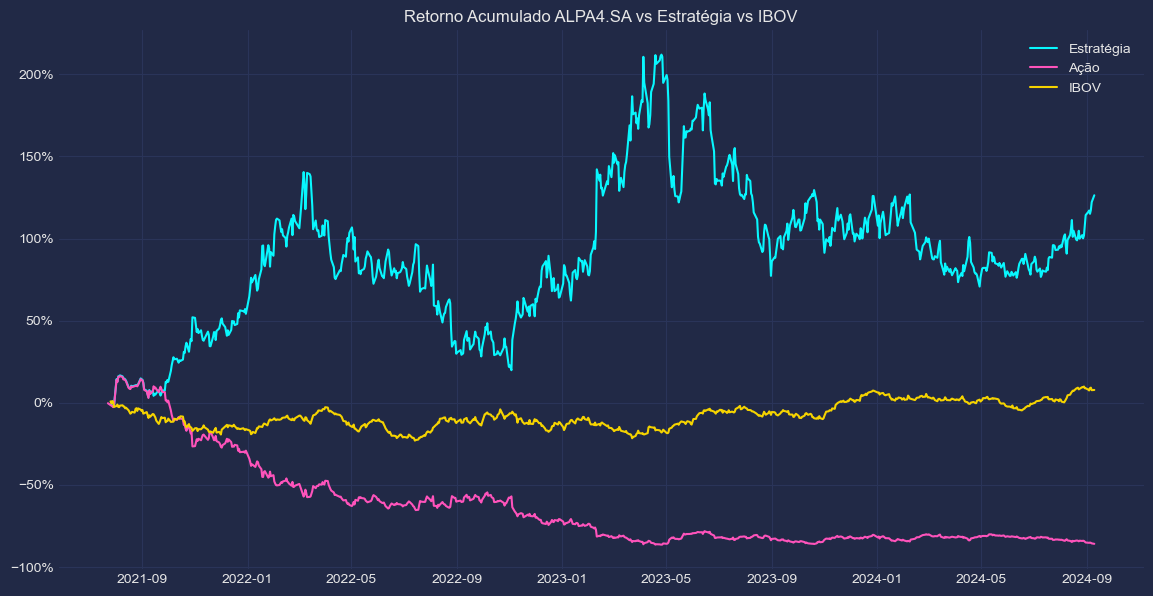

In [153]:
plt.figure(figsize= (14,7))
plt.plot(dados["retorno_acum_modelo"], label="Estratégia")
plt.plot(dados["retorno_acum_acao"], label="Ação")
plt.plot(dados["retorno_ibov"], label="IBOV")
plt.legend(loc = 'best')
plt.title(f'Retorno Acumulado {ticker} vs Estratégia vs IBOV')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
